# Linear Regression Model

This section focuses on building and evaluating a **Linear Regression** model using the cleaned dataset. The aim is to investigate the relationship between various 3D printing parameters and the output variable, allowing us to make predictions and assess the importance of different features.

We will go through the following steps:
- Importing relevant libraries and loading the preprocessed dataset
- Preparing the data for training and testing
- Fitting the linear regression model
- Evaluating model performance using error metrics
- Interpreting results and visualising predictions

## Importing Libraries and Loading Cleaned Dataset

Firstly, import Python libraries:

- `pandas` for data manipulation and analysis.
- `numpy` for numerical operations.
- `matplotlib.pyplot` for plotting.
- `sklearn.model_selection.train_test_split` to split the data into training and testing sets.
- `sklearn.linear_model.LinearRegression` for implementing the linear regression model.
- `sklearn.metrics` for evaluating model performance using metrics.

Next, the cleaned dataset (`clean_dataset.csv`) is loaded using `pd.read_csv()`. To ensure consistency in column names, any leading or trailing whitespace is removed using `dataset.columns.str.strip()`.

Finally, the first few rows of the dataset are displayed using `dataset.head()` to confirm successful loading and inspect the data structure.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns


dataset = pd.read_csv('clean_dataset.csv')
dataset.columns = dataset.columns.str.strip()
print(dataset.head())

   layer_height  wall_thickness  infill_density  nozzle_temperature  \
0          0.02               8              90                 220   
1          0.02               7              90                 225   
2          0.02               1              80                 230   
3          0.02               4              70                 240   
4          0.02               6              90                 250   

   bed_temperature  print_speed  fan_speed  infill_pattern_honeycomb  \
0               60           40          0                     False   
1               65           40         25                      True   
2               70           40         50                     False   
3               75           40         75                      True   
4               80           40        100                     False   

   material_pla  roughness  tension_strenght  elongation  
0         False         25                18         1.2  
1         False       

## Roughness Prediction Using Linear Regression

In this section, we aim to predict the `roughness` of 3D printed parts based on several input features using a **Linear Regression** model.

### Steps:

- We define `y_roughness` as the target variable (`roughness`) and remove it, along with other dependent variables, from the feature set `X`.
- The dataset is split into training (80%) and testing (20%) subsets using `train_test_split`.
- A linear regression model (`LinearRegression`) is trained on the training data.
- Predictions are generated for the test set, and the model is evaluated using:
  - **R² Score** (for both train and test)
  - **Mean Absolute Error (MAE)**
  - **Root Mean Squared Error (RMSE)**

### Evaluation Summary:

- The training R² score indicates how well the model fits the training data.
- The testing R² score reflects generalisation performance.
- MAE and RMSE provide insights into the average prediction error and error spread.

Finally, a scatter plot visualises the relationship between actual and predicted roughness values, with a red dashed line showing ideal performance (perfect prediction).

This step helps assess the model's ability to predict roughness based on input parameters, which is crucial for understanding print quality.

Roughness Prediction Metrics:
Train R² Score: 0.9432
Test  R² Score: 0.5366
MAE: 36.4707
RMSE: 42.5771


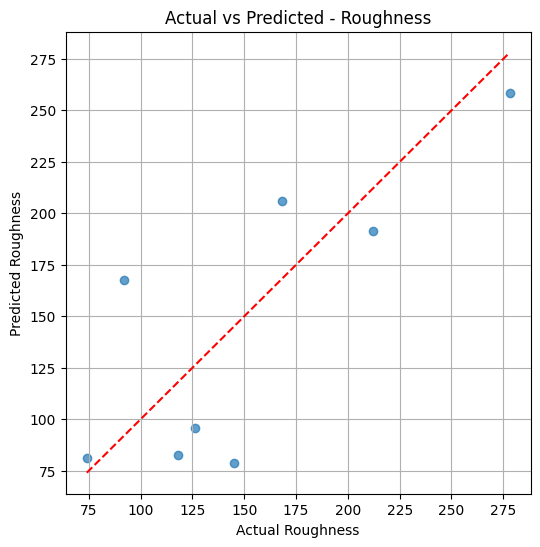

In [32]:
X = dataset.drop(columns=['roughness', 'tension_strenght', 'elongation'])
y_roughness = dataset['roughness']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_roughness, test_size=0.2, random_state=42)

lr_model_r = LinearRegression()
lr_model_r.fit(X_train_r, y_train_r)

y_pred_r = lr_model_r.predict(X_test_r)

mae_r = mean_absolute_error(y_test_r, y_pred_r)
rmse_r = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2_r_test = r2_score(y_test_r, y_pred_r)
r2_r_train = lr_model_r.score(X_train_r, y_train_r)

print("Roughness Prediction Metrics:")
print(f"Train R² Score: {r2_r_train:.4f}")
print(f"Test  R² Score: {r2_r_test:.4f}")
print(f"MAE: {mae_r:.4f}")
print(f"RMSE: {rmse_r:.4f}")

plt.figure(figsize=(6,6))
plt.scatter(y_test_r, y_pred_r, alpha=0.7)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Actual vs Predicted - Roughness")
plt.grid(True)
plt.show()

## Elongation Prediction Using Linear Regression

This section applies a **Linear Regression** model to predict the `elongation` of 3D printed parts using the same feature set `X`.

### Steps:

- The `elongation` column is set as the target variable `y_elongation`.
- Data is split into training and testing subsets (80%/20%) to train and evaluate the model.
- The linear regression model is fitted to the training data and used to predict elongation values on the test set.
- Evaluation metrics are the same as the ones listed previously.

### Evaluation Summary:

- A R² test score (~0.6451) tells us the model captures the relationship fairly well.
- Visualisation of actual vs predicted elongation provides a quick visual assessment of prediction performance.

These results offer insight into how well the input variables explain material elongation, supporting further optimisation or modelling.


Elongation Prediction:
MAE: 0.3710
RMSE: 0.4018
Train R² Score: 0.7003
Test  R² Score: 0.6451


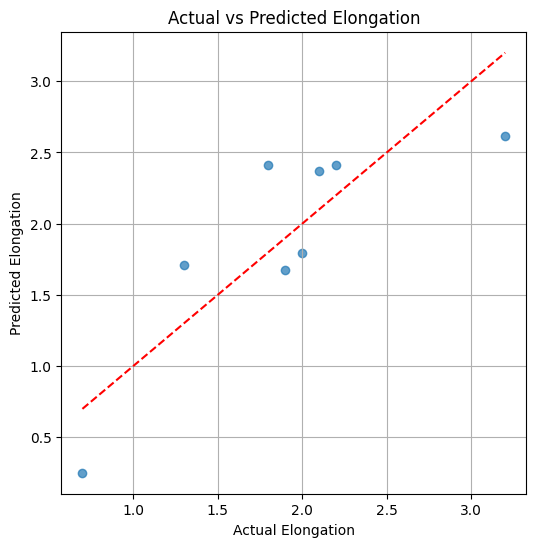

In [33]:
y_elongation = dataset['elongation']

X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_elongation, test_size=0.2, random_state=42)

lr_model_e = LinearRegression()
lr_model_e.fit(X_train_e, y_train_e)

y_pred_e = lr_model_e.predict(X_test_e)

mae_e = mean_absolute_error(y_test_e, y_pred_e)
rmse_e = np.sqrt(mean_squared_error(y_test_e, y_pred_e))
r2_e_test = r2_score(y_test_e, y_pred_e)
r2_e_train = lr_model_e.score(X_train_e, y_train_e)

print("\nElongation Prediction:")
print(f"MAE: {mae_e:.4f}")
print(f"RMSE: {rmse_e:.4f}")
print(f"Train R² Score: {r2_e_train:.4f}")
print(f"Test  R² Score: {r2_e_test:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test_e, y_pred_e, alpha=0.7)
plt.plot([y_test_e.min(), y_test_e.max()], [y_test_e.min(), y_test_e.max()], color='red', linestyle='--')
plt.xlabel('Actual Elongation')
plt.ylabel('Predicted Elongation')
plt.title('Actual vs Predicted Elongation')
plt.grid(True)
plt.show()

## Tensile Strength Prediction Using Linear Regression

This section develops a **Linear Regression** model to predict the `tension_strength` of 3D printed parts.

### Process:

- The `tension_strength` column is used as the target variable (`y_strength`).
- A training-test split (80/20) is performed to evaluate generalisation.
- The model is trained on the training subset and used to predict on the test subset.
- Evaluation metrics are again the same as the ones above.

### Evaluation Results:

- The **R² test score** of ~0.3043 indicates a weaker fit compared to previous models (e.g. elongation or roughness).
- A relatively high RMSE suggests further improvement could be achieved with alternative modelling techniques or feature engineering.

A scatter plot of actual vs predicted values further visualises model accuracy.


Tensile Strength Prediction:
MAE: 5.4613
RMSE: 6.4743
Train R² Score: 0.6963
Test  R² Score: 0.3043


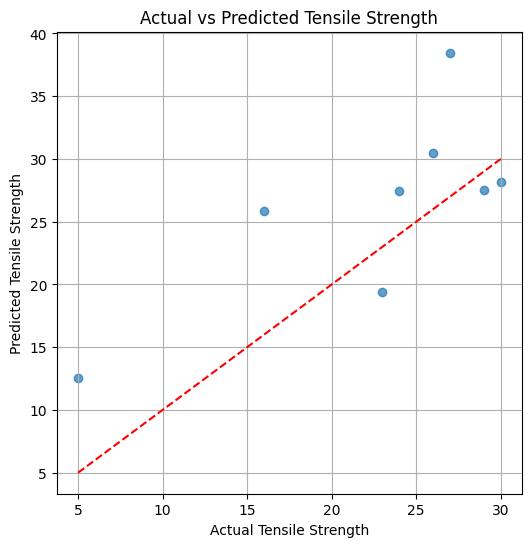

In [ ]:
y_strength = dataset['tension_strenght']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_strength, test_size=0.2, random_state=42)


lr_model_s = LinearRegression()
lr_model_s.fit(X_train_s, y_train_s)

y_pred_s = lr_model_s.predict(X_test_s)

mae_s = mean_absolute_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
r2_s_test = r2_score(y_test_s, y_pred_s)
r2_s_train = lr_model_s.score(X_train_s, y_train_s)

print("\nTensile Strength Prediction:")
print(f"MAE: {mae_s:.4f}")
print(f"RMSE: {rmse_s:.4f}")
print(f"Train R² Score: {r2_s_train:.4f}")
print(f"Test  R² Score: {r2_s_test:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test_s, y_pred_s, alpha=0.7)
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], color='red', linestyle='--')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.grid(True)
plt.show()

## Feature Correlation with Roughness

To identify the feature most strongly related to `roughness`, we compute the **correlation matrix** for all numerical features in the dataset. We then isolate the correlations of `roughness` with other variables and identify the top correlated feature.

- The most correlated feature with `roughness` is **layer_height**, with a correlation coefficient of **0.88**, indicating a strong positive linear relationship.

This insight helps justify feature selection in model development, particularly when targeting roughness prediction.

In [35]:
correlation = dataset.corr(numeric_only=True)
correlation_target = correlation['roughness'].drop('roughness').abs().sort_values(ascending=False)
top_feature = correlation_target.index[0]
print(f"Most correlated feature with roughness: {top_feature} ({correlation_target.iloc[0]:.2f})")


Most correlated feature with roughness: layer_height (0.88)


### Visualising Correlation

A scatter plot of `layer_height` versus `roughness` is used to visually confirm this relationship. The upward trend reinforces the numerical result from the correlation matrix, suggesting that increases in layer height tend to result in higher surface roughness in printed parts.

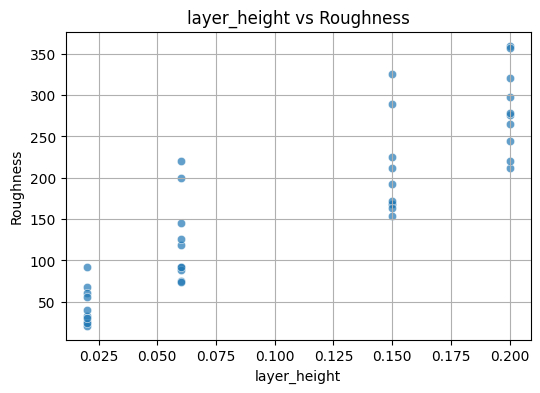

In [36]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=dataset[top_feature], y=dataset['roughness'], alpha=0.7)
plt.xlabel(top_feature)
plt.ylabel('Roughness')
plt.title(f'{top_feature} vs Roughness')
plt.grid(True)
plt.show()

This plot shows the relationship between the most correlated feature and the target variable `roughness`.  
If a clear trend is visible (e.g., upward or downward), it suggests this feature is a strong predictor and may influence model accuracy.

## Linear Regression Performance Summary and Overfitting Check

To evaluate the effectiveness of the linear regression models, we summarise the R² scores for both training and test datasets for each of the three target variables: `roughness`, `elongation`, and `tension strength`.

This summary helps assess model performance and detect signs of **overfitting** — where a model performs well on training data but poorly on unseen test data.

From the results:
- `Roughness` shows a large drop in R² from training (0.9432) to testing (0.5366), so **possible overfitting**.
- `Elongation` maintains similar performance across both sets (0.7003 train vs 0.6451 test), so **generalises well**.
- `Tension strength` shows a noticeable drop (0.6963 train vs 0.3043 test), so **potential overfitting**.

A basic conditional check is applied to highlight any features where the difference between train and test R² exceeds 0.15 — a practical threshold for identifying significant generalisation gaps.

These insights guide model refinement strategies such as feature selection, regularisation, or exploring alternative modelling approaches.

In [37]:
print("Linear Regression Summary")
print(f"Roughness  - Train R²: {r2_r_train:.4f} | Test R²: {r2_r_test:.4f}")
print(f"Elongation - Train R²: {r2_e_train:.4f} | Test R²: {r2_e_test:.4f}")
print(f"Tensile    - Train R²: {r2_s_train:.4f} | Test R²: {r2_s_test:.4f}")


Linear Regression Summary
Roughness  - Train R²: 0.9432 | Test R²: 0.5366
Elongation - Train R²: 0.7003 | Test R²: 0.6451
Tensile    - Train R²: 0.6963 | Test R²: 0.3043


## Overfitting Detection Using R² Comparison

To assess the generalisation capability of each model, we compare the training and test R² scores. A large discrepancy between them can signal **overfitting**, where the model performs well on the training data but struggles with unseen data.

We apply a threshold of **0.15** on the absolute difference between train and test R² to flag potential overfitting.

### Results:
- **Roughness** model: difference = 0.9432 - 0.5366 = 0.4066 = **Overfitting likely**
- **Elongation** model: difference = 0.7003 - 0.6451 = 0.0552 = **Generalises well**
- **Tension Strength** model: difference = 0.6963 - 0.3043 = 0.3920 = **Overfitting likely**

This analysis provides an automated and interpretable check for overfitting, guiding further optimisation of model complexity or regularisation.

In [38]:
if abs(r2_r_train - r2_r_test) > 0.15:
    print("Roughness model may be overfitting.")
else:
    print("Roughness model generalizes well.")

if abs(r2_e_train - r2_e_test) > 0.15:
    print("Elongation may be overfitting.")
else:
    print("Elongation generalizes well.")

if abs(r2_s_train - r2_s_test) > 0.15:
    print("tension strength may be overfitting.")
else:
    print("tension strength generalizes well.")

Roughness model may be overfitting.
Elongation generalizes well.
tension strength may be overfitting.


### Final Summary: Linear Regression Notebook

This notebook presents the implementation and evaluation of Linear Regression models to predict three output variables — Roughness, Elongation, and Tension Strength — based on 3D printing parameters.

1. **Model Development**  
   For each target, the dataset was split into training and testing subsets. A Linear Regression model was fitted using scikit-learn, and its performance was evaluated using R², MAE, and RMSE.

2. **Visual and Quantitative Evaluation**  
   Actual vs Predicted scatter plots and residual trends were used to assess model accuracy. Overfitting was evaluated by comparing training and test R² values, with models showing significant R² drops flagged for poor generalisation.

3. **Feature Insights**  
   A correlation matrix identified the most influential input for each target. For roughness, `layer_height` was found to be highly correlated, supporting its inclusion in modelling.

4. **Interpretability and Limitations**  
   While the models performed reasonably for roughness and elongation, tension strength proved more difficult to predict, potentially requiring more complex or regularised models.

This notebook demonstrates a complete workflow for linear modelling, including model justification, performance analysis, overfitting detection, and visual diagnostics — all contributing to a transparent and reproducible evaluation process.